/Users/finnwethall


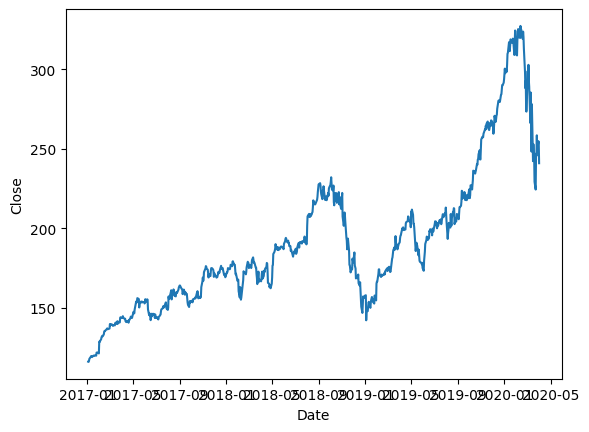

116.1500015258789
9092    116.150002
9093    117.019997
9094    115.610001
9095    116.910004
9096    119.989998
           ...    
9904    258.440002
9905    247.740005
9906    253.809998
9907    255.289993
9908    240.910004
Name: random_prediction, Length: 817, dtype: float64


/var/folders/nl/1f7c_4_n3qs5n0yhzmnj0qcr0000gn/T/ipykernel_66664/1764437.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_modern_df['random_prediction'] = [val + random.randint(-1,1) for val in apple_modern_df['Close']]


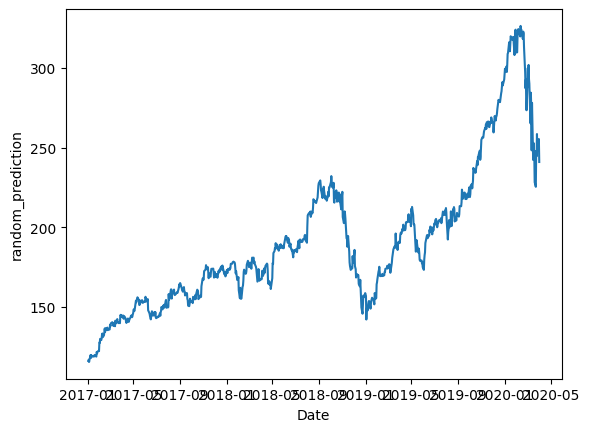

In [19]:
%matplotlib inline

import numpy as np
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import random
print(os.getcwd())
#os.chdir('/Users/finnwethall/Downloads')
apple_df = pd.read_csv('/Users/finnwethall/Downloads/archive/stocks/AAPL.csv')
apple_df['Date'] = pd.to_datetime(apple_df['Date'])


cutoff = datetime(2017,1,1)
apple_modern_df = apple_df[apple_df['Date'] > cutoff]


sns.lineplot(x='Date', y='Close', data=apple_modern_df)
plt.show()

#random Walk

#we initialize a random walk with starting value equal to that of the last stock price for the modern era. 
#this should create a general 
start = apple_df[apple_df['Date'] == '2017-01-03']['Close'].values[0]
print(start)
walk = [start]
#with i = 1000, we predict for roughly 3 years
for i in range(1000):
    up_or_down = random.randint(0,1)
    
    if up_or_down == 1:
        val = walk[-1] +1
        walk.append(val)
    else :
        val = walk[-1]-1
        walk.append(val)


#print(walk)
#plt.plot(range(len(walk)), walk)
#plt.title('Walk')
#plt.show()

#val + random.randint(-1,1) for val in apple_modern_df['close']
apple_modern_df['random_prediction'] = [val + random.randint(-1,1) for val in apple_modern_df['Close']]

print(apple_modern_df['random_prediction'])

sns.lineplot(data=apple_modern_df, x='Date', y='random_prediction')
plt.show()

